In [1]:
import pandas as pd
import numpy as np
!pip install seaborn
!pip install WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

In [2]:
data = pd.read_csv("mb_data.csv")
data.head(10)
# to see how data looks and to check whether the dataset is uploaded fine

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

In [3]:
data.info()
# to check how many entries are loaded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:

data.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [5]:
# to check the classes of personality types in the dataset
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [6]:
# This code defines a function named show_class_distribution that takes a dataset, 
# a column name representing categories, and optional parameters for plot customization,
# then visualizes the distribution of categories using Seaborn's countplot function.
def show_class_distribution(data, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


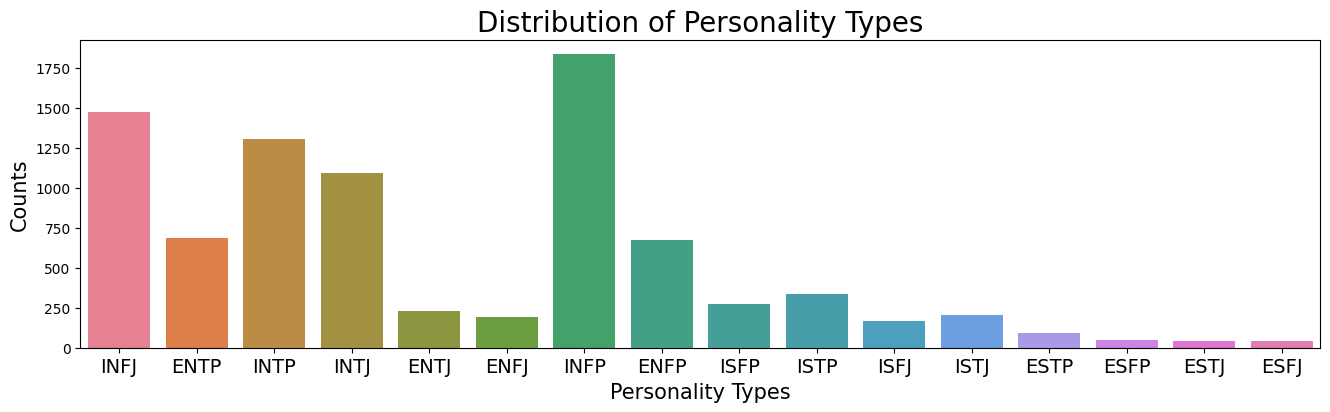

In [7]:
show_class_distribution(data, xticks_size=14)

In [8]:

# This code defines a function called divide_types that adds four new columns ("E-I", "N-S", "F-T", "J-P") to a DataFrame (df). 
# def divide_types(df):
def divide_types(df):
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    for index, row in df.iterrows():
        row["E-I"] = "E" if row.type[0] == "E" else "I"
        row["N-S"] = "N" if row.type[1] == "N" else "S"
        row["F-T"] = "F" if row.type[2] == "F" else "T"
        row["J-P"] = "J" if row.type[3] == "J" else "P"
    return df

data = divide_types(data)


C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


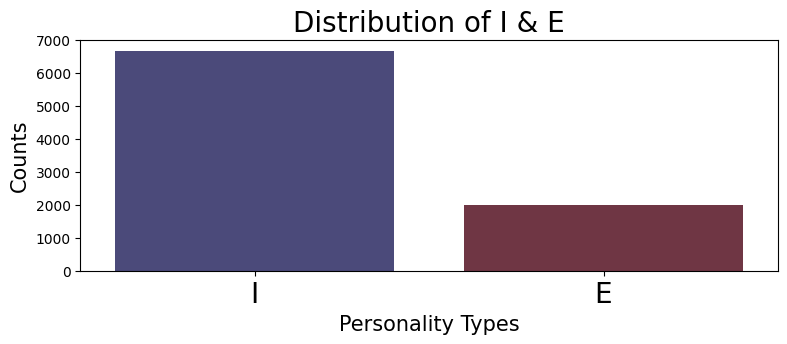

In [9]:
show_class_distribution(data, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


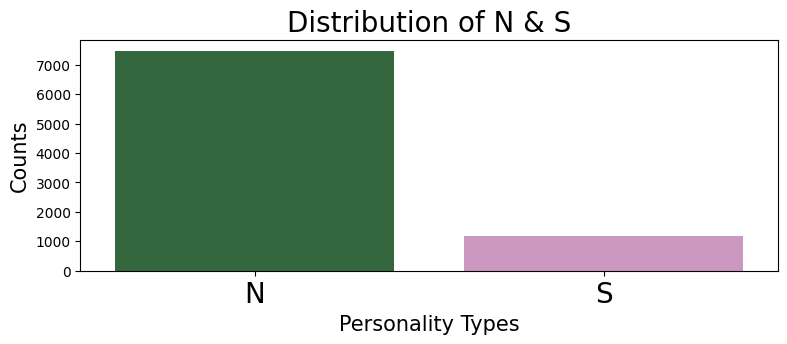

In [10]:
show_class_distribution(data, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


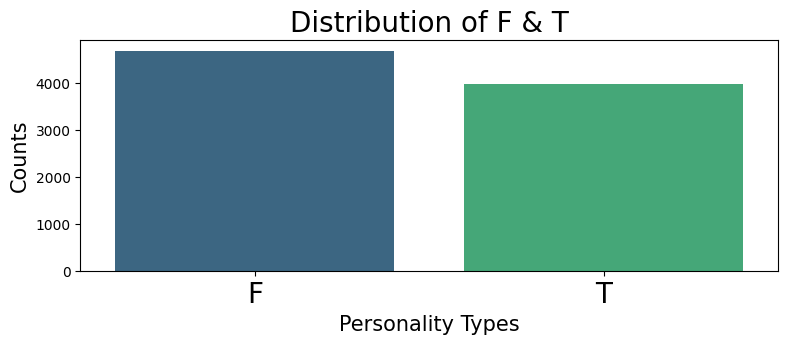

In [11]:
show_class_distribution(data, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")


C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


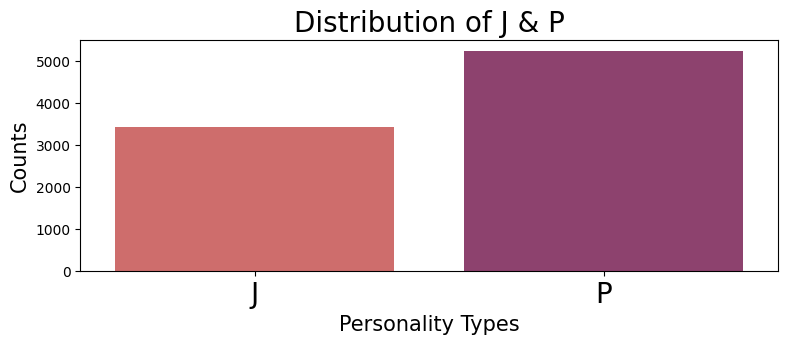

In [12]:
show_class_distribution(data, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")

In [13]:
# retrieves the value located at row 7
data.loc[7, "posts"]

"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called  'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it.  Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every couple of months, as said earlier some people just dont get it but the good ones do :)  Edit: i mostly mean tolerate it...|||where do we go when we sleep? is dreaming another form of being awake? how many more layers of this are there if any?   thoughts about sleep keep me up at night  Edit: sometimes im too scared...|||thanks|||i wish i was free to follow my interests as i desired  i feel as though wishes are meant for impossible things|||by seeing do you mean visual interpreting or seeing as in mentally understanding the concept?|||hello|||

In [14]:
# fix_contractions:


def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(data)
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

data = clean_data(data)

In [15]:
data.loc[7,"cleaned_post"]

'tend build collection things desktop that use frequently and then move them into folder called everything from there get sorted into type and sub type ike collect odd objects even work lot people would call junk but like collect old unused software ill take that off your hands have bunch old adobe think its quite normal tend only see friends real life every couple months said earlier some people just not get but the good ones edit mostly mean tolerate where when sleep dreaming another form being awake how many more layers this are there any thoughts about sleep keep night edit sometimes too scared thanks wish was free follow interests desired feel though wishes are meant for impossible things seeing you mean visual interpreting seeing mentally understanding the concept hello feel though incapable creating anything and wish could cannot stand the interviewer christ that laugh intj hmmm would interesting see intj this show doubt they would that interesting the general public though know

In [16]:
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  
0  and intj moments sportscenter not top ten play...          454  
1  finding the lack these posts very alarming sex...          874  
2  good one course which say know that blessing a...          653  
3  dear intp enjoyed our conversation the other d...          820  
4  you are fired that another silly misconception...          782

In [17]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)


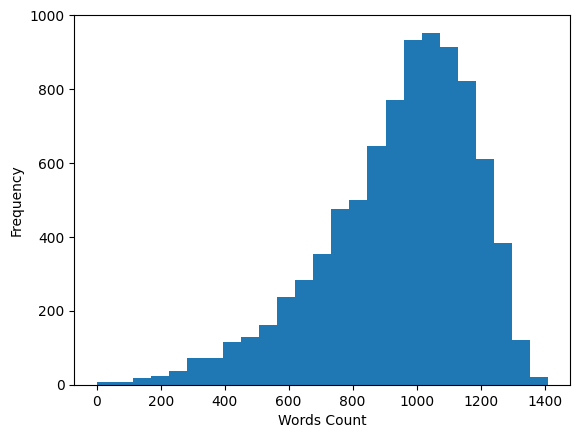

In [18]:
    plot_counts(data, column="words_count", xlabel="Words Count")

In [19]:
data["char_count"] = data["cleaned_post"].apply(lambda x: len(x))
data.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  
0  and intj moments sportscenter not top ten play...          454        2764  
1  finding the lack these posts very alarming sex...          874        5104  
2  good one course which say know that blessing a...          653        4000  
3  dear intp enjoyed our conversation the other d...          820        4938  
4  you are fired that another silly misconception...          782        4692

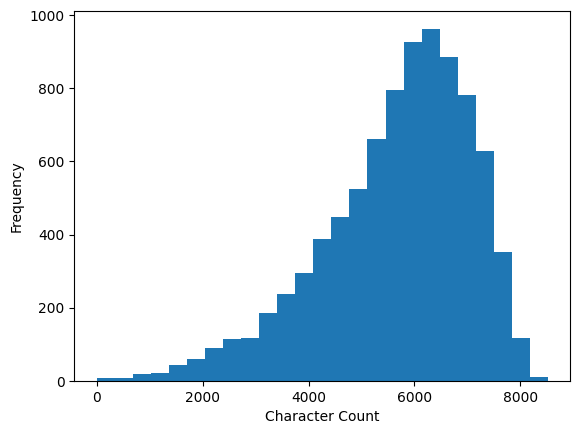

In [20]:
plot_counts(data, column="char_count", xlabel="Character Count")

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PRACHI
[nltk_data]     VARSHNEY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stopword_list = stopwords.words("english")

In [23]:
def get_most_frequent(data, stop_words, column="cleaned_post", top=25):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [24]:
most_frequents = get_most_frequent(data, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

In [25]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)    
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()

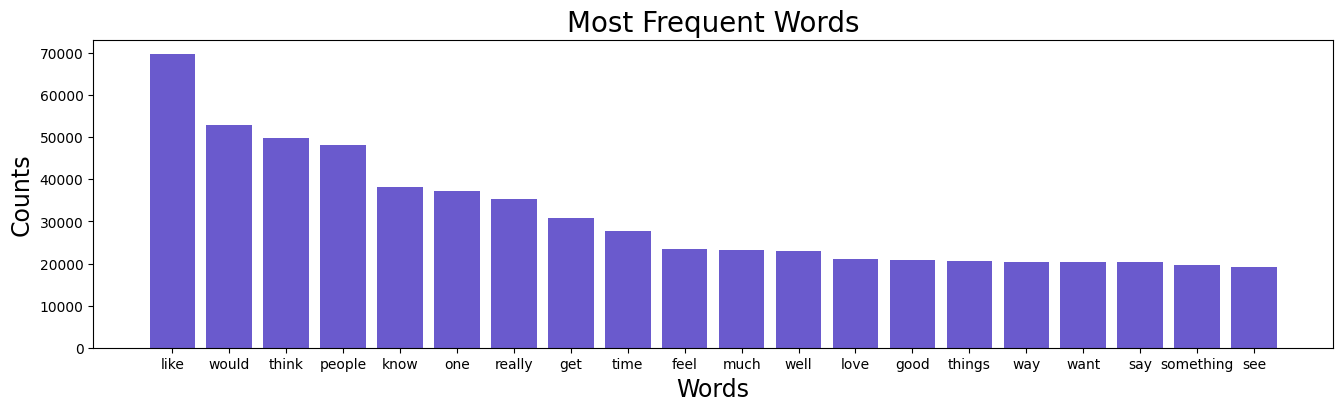

In [26]:
show_most_frequents(most_frequents)

In [27]:
def show_wordcloud(data, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(15,5))
    wordcloud = WordCloud(background_color="black", min_font_size=5, stopwords=stopword_list).generate(data[column].to_string())
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

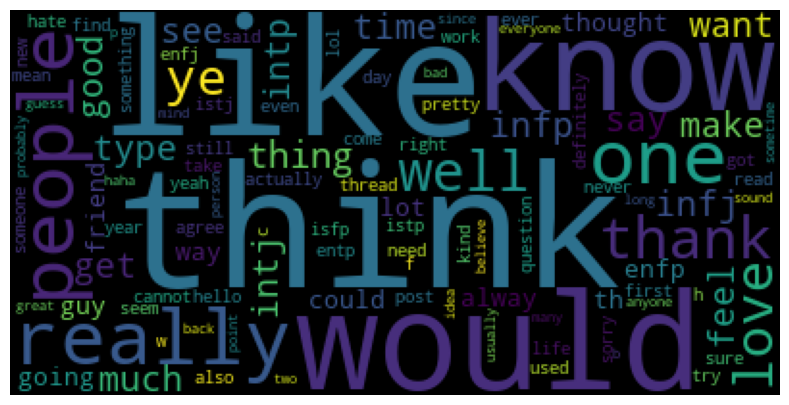

In [28]:
show_wordcloud(data, stopword_list)

In [29]:
def show_sub_wordclouds(data, type_column, column, size, fig_size=(20,15)):
    classes = data[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = data[data[type_column] == _class]
        wordcloud = WordCloud(background_color="black").generate(temp[column].to_string())
        plt.subplot(*size, j+1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j+=1

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\948420303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(*size, j+1)


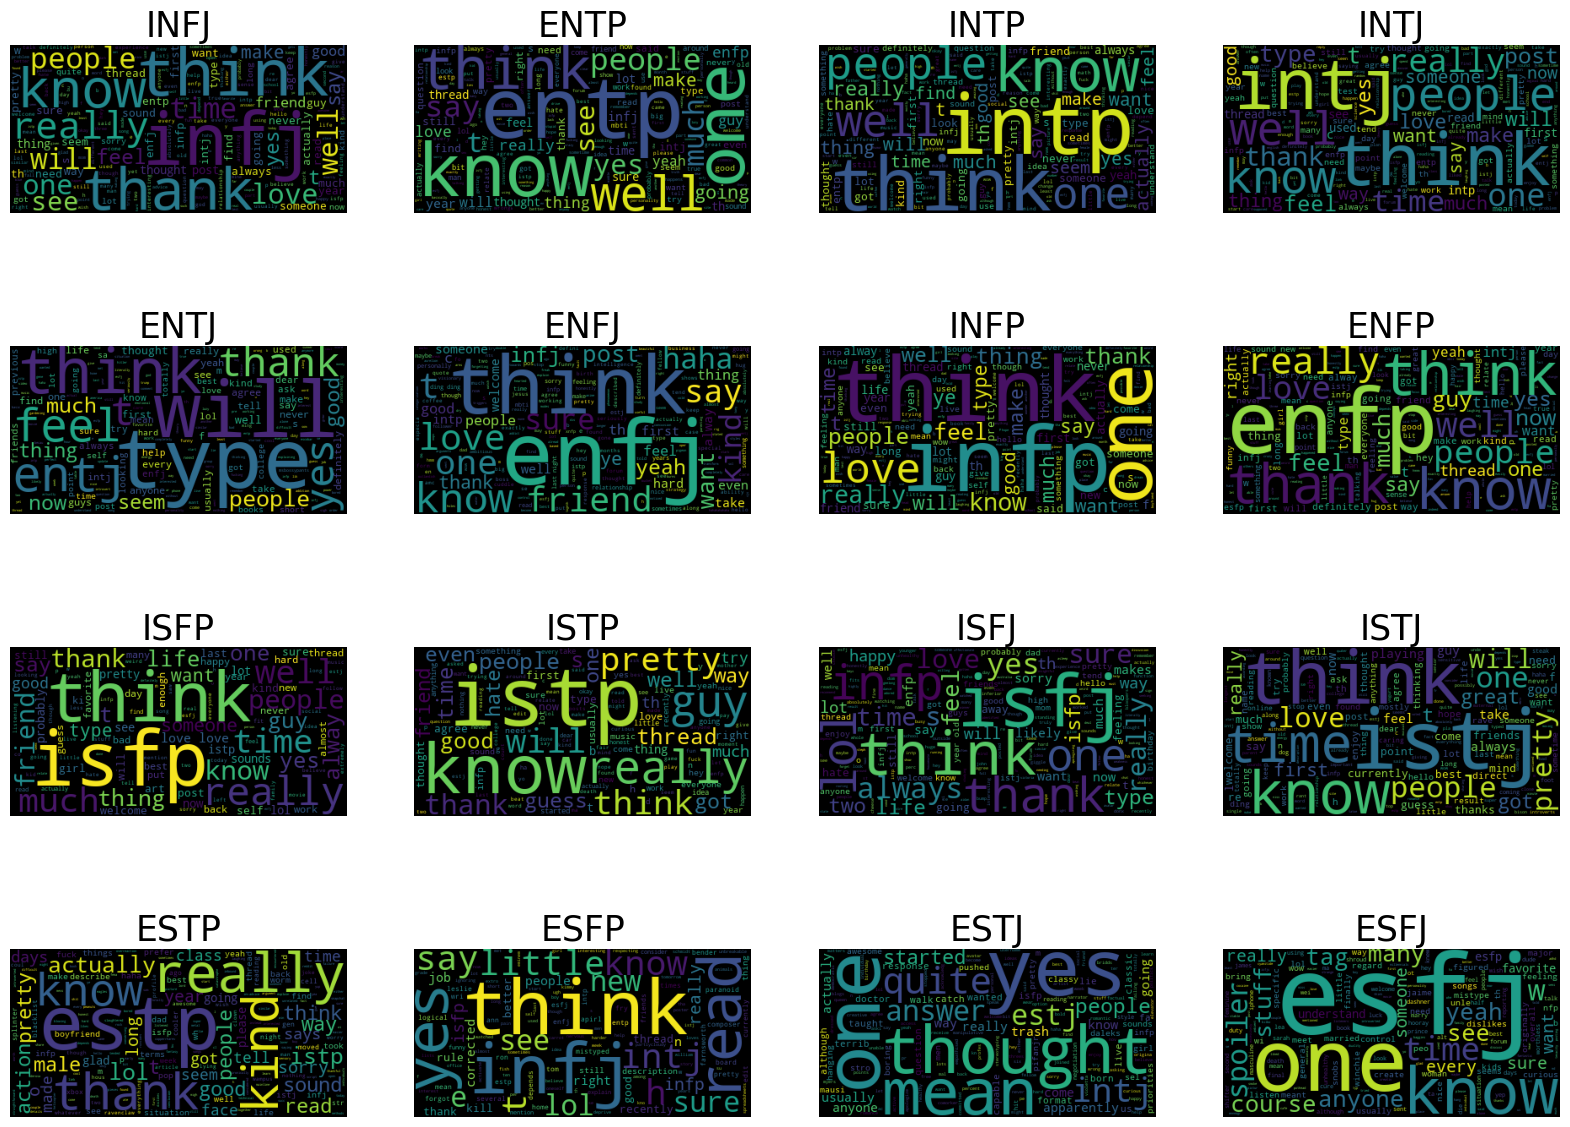

In [30]:
show_sub_wordclouds(data, type_column="type" , column="cleaned_post", size=(4,4))

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\948420303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(*size, j+1)


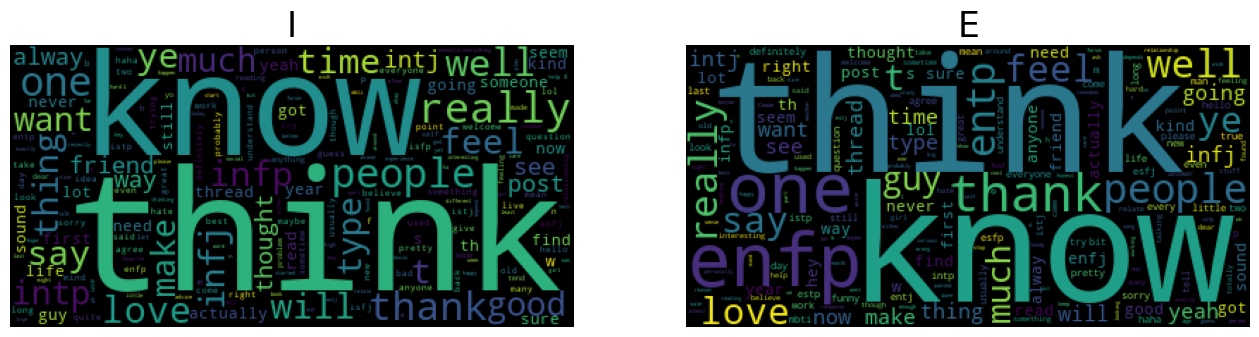

In [31]:
show_sub_wordclouds(data, type_column="E-I" , column="cleaned_post", size=(1,2), fig_size=(16,8))

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\948420303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(*size, j+1)


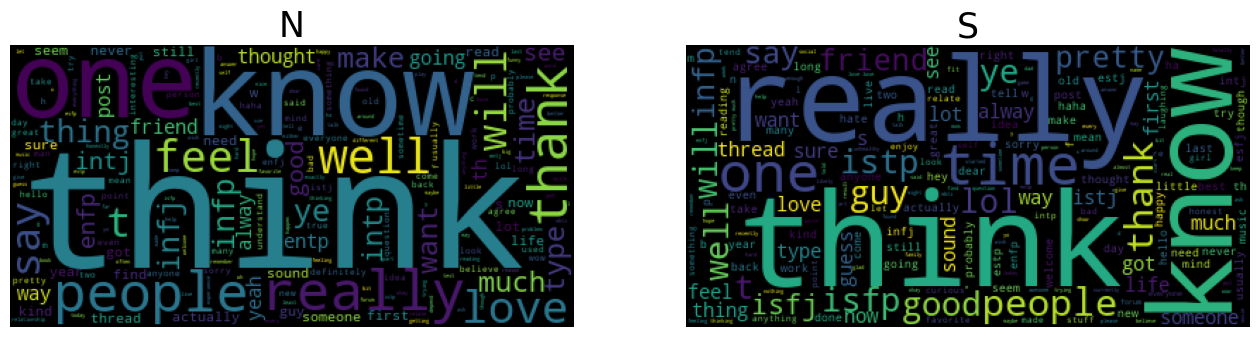

In [32]:
show_sub_wordclouds(data, type_column="N-S" , column="cleaned_post", size=(1,2), fig_size=(16,8))

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\948420303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(*size, j+1)


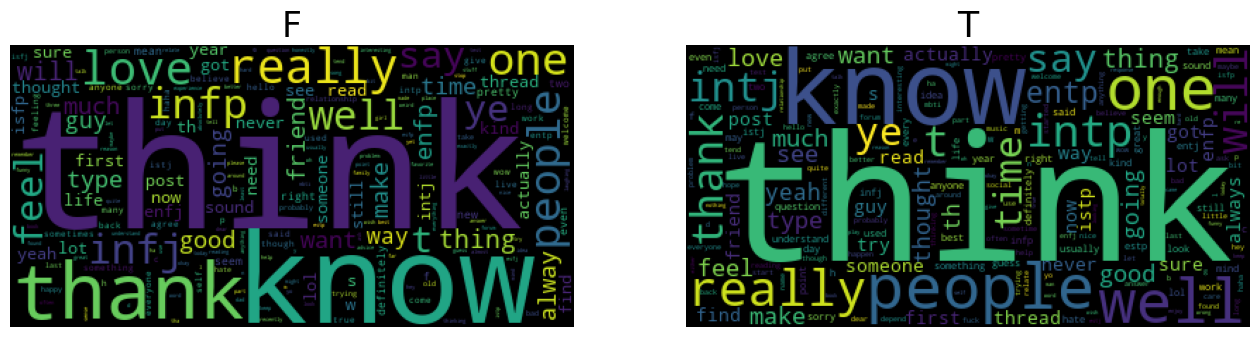

In [33]:

show_sub_wordclouds(data, type_column="F-T" , column="cleaned_post", size=(1,2), fig_size=(16,8))
     

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\948420303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(*size, j+1)


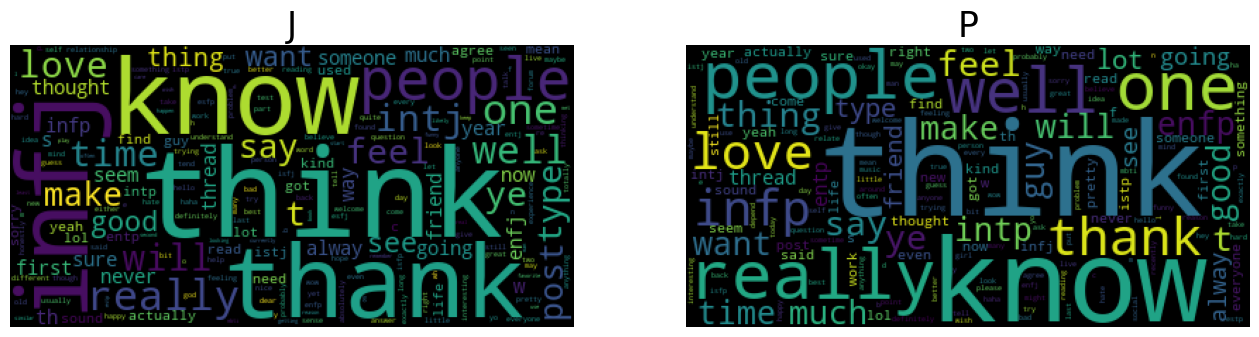

In [34]:

show_sub_wordclouds(data, type_column="J-P" , column="cleaned_post", size=(1,2), fig_size=(16,8))

In [35]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"]  = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    data[new_column]   = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return data

In [36]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  
0  [(intj, moments), (moments, sportscenter), (sp...  
1  [(finding, lack), (lack, posts), (posts, alarm...  
2  [(good, one), (one, course), (course, say), (s...  
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...  
4  [(fired, another), (another, silly), (silly, m...

In [37]:
data = get_ngrams(data, n_gram=3, new_column="trigrams")
data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [38]:
def most_common_ngram(data, column, top=20):
    temp = []
    for index, row in data.iterrows():
        temp += row[column]
    most_common = Counter(temp).most_common(top)
    return most_common

In [39]:

def plot_n_grams(ngrams, title, top=20):
    ngram_df = pd.DataFrame(ngrams)
    ngram_df.iloc[:, 0] = ngram_df.iloc[:,0].astype(str)
    plt.figure(figsize=(7,7))
    plt.barh(y=ngram_df.iloc[:top, 0], width=ngram_df.iloc[:top, 1])
    plt.xlabel("Counts", size=17)
    plt.ylabel("Pairs", size=17)
    plt.title(title, size = 20)
    plt.show() 

In [40]:
bigrams_most_common = most_common_ngram(data, "bigrams")
bigrams_most_common

[(('feel', 'like'), 5642),
 (('would', 'say'), 4073),
 (('would', 'like'), 3429),
 (('sounds', 'like'), 2606),
 (('pretty', 'much'), 2409),
 (('high', 'school'), 2216),
 (('even', 'though'), 1922),
 (('seems', 'like'), 1902),
 (('best', 'friend'), 1692),
 (('really', 'like'), 1576),
 (('think', 'would'), 1573),
 (('get', 'along'), 1551),
 (('years', 'ago'), 1460),
 (('long', 'time'), 1459),
 (('using', 'tapatalk'), 1376),
 (('personality', 'type'), 1337),
 (('someone', 'else'), 1272),
 (('many', 'people'), 1270),
 (('something', 'like'), 1267),
 (('people', 'think'), 1219)]

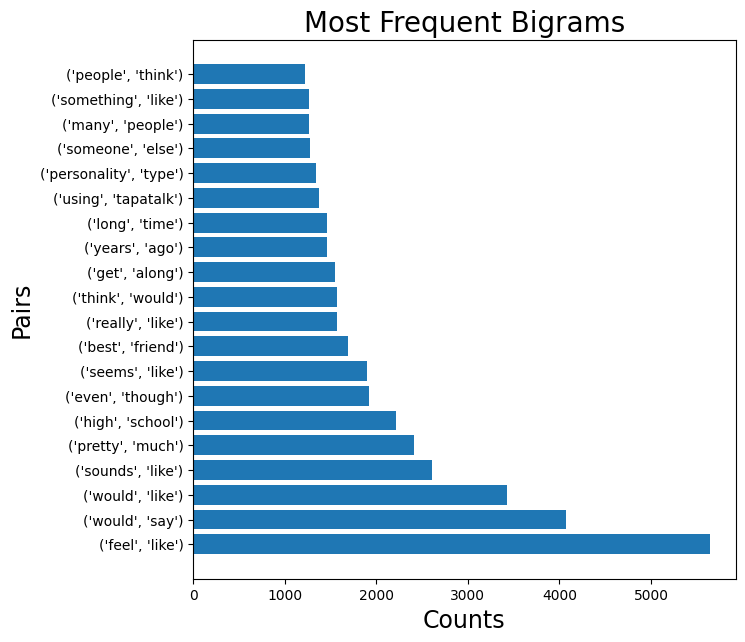

In [41]:
plot_n_grams(bigrams_most_common, title="Most Frequent Bigrams")

In [42]:

trigrams_most_common = most_common_ngram(data, "trigrams")
trigrams_most_common

[(('sent', 'iphone', 'using'), 702),
 (('iphone', 'using', 'tapatalk'), 686),
 (('sent', 'using', 'tapatalk'), 331),
 (('one', 'best', 'friends'), 280),
 (('get', 'along', 'well'), 253),
 (('sometimes', 'feel', 'like'), 207),
 (('would', 'like', 'know'), 192),
 (('long', 'time', 'ago'), 183),
 (('low', 'self', 'esteem'), 173),
 (('anything', 'may', 'affect'), 173),
 (('may', 'affect', 'way'), 171),
 (('affect', 'way', 'answer'), 168),
 (('yes', 'yes', 'yes'), 168),
 (('spend', 'lot', 'time'), 165),
 (('wikipedia', 'free', 'encyclopedia'), 162),
 (('way', 'answer', 'questions'), 158),
 (('answer', 'questions', 'example'), 150),
 (('questions', 'example', 'stressful'), 145),
 (('example', 'stressful', 'time'), 144),
 (('stressful', 'time', 'mental'), 140)]

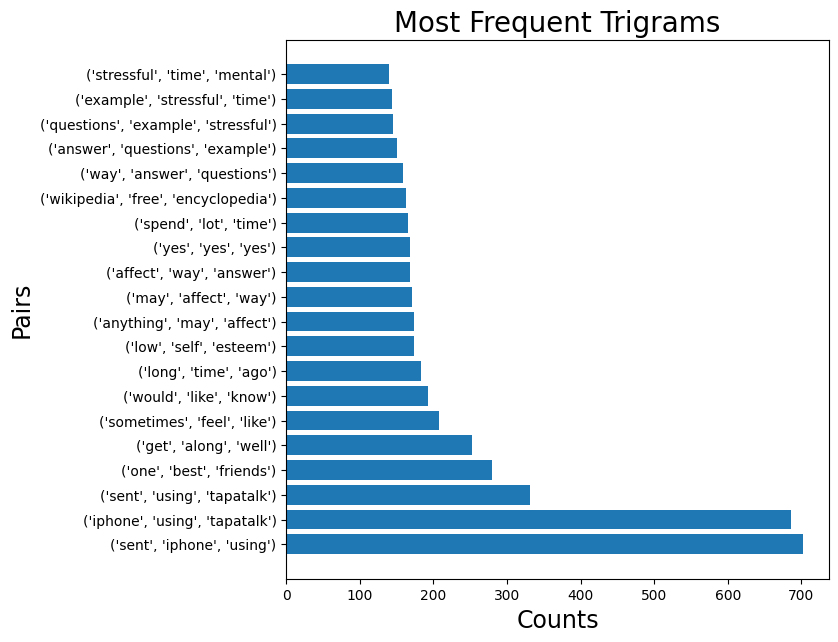

In [43]:
plot_n_grams(trigrams_most_common, title="Most Frequent Trigrams")

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\PRACHI
[nltk_data]     VARSHNEY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:

def remove_stopwords(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(word_tokenize)
    data[column] = data[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return data
     

In [46]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [47]:

def lemmatize(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(apply_lemmatization)
    data[column] = data[column].apply(" ".join)
    return data

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PRACHI
[nltk_data]     VARSHNEY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
data = remove_stopwords(data, stopword_list)

In [50]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\PRACHI
[nltk_data]     VARSHNEY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
data = lemmatize(data, stopword_list)

In [52]:

data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  intj moment sportscenter top ten play prank li...          454        2764   
1  finding lack post alarming sex boring position...          874        5104   
2  good one course say know blessing curse absolu...          653        4000   
3  dear intp enjoyed conversation day esoteric ga...          820        4938   
4  fired another silly misconception approaching ...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [53]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
training_data.head(5)

cleaned_post E-I N-S F-T J-P
0  intj moment sportscenter top ten play prank li...   I   N   F   J
1  finding lack post alarming sex boring position...   E   N   T   P
2  good one course say know blessing curse absolu...   I   N   T   P
3  dear intp enjoyed conversation day esoteric ga...   I   N   T   J
4  fired another silly misconception approaching ...   E   N   T   J

In [54]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data

In [55]:
training_data = make_dummies(training_data)
training_data.head()

cleaned_post E-I N-S F-T J-P  type_E  \
0  intj moment sportscenter top ten play prank li...   I   N   F   J       0   
1  finding lack post alarming sex boring position...   E   N   T   P       1   
2  good one course say know blessing curse absolu...   I   N   T   P       0   
3  dear intp enjoyed conversation day esoteric ga...   I   N   T   J       0   
4  fired another silly misconception approaching ...   E   N   T   J       1   

   type_I  type_N  type_S  type_F  type_T  type_J  type_P  
0       1       1       0       1       0       1       0  
1       0       1       0       0       1       0       1  
2       1       1       0       0       1       0       1  
3       1       1       0       0       1       1       0  
4       0       1       0       0       1       1       0

In [56]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\1065409426.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4, j+1)
C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\1065409426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette)
C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\1065409426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette)
C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\1065409426.py:7: FutureWarning: 

Passing `pale

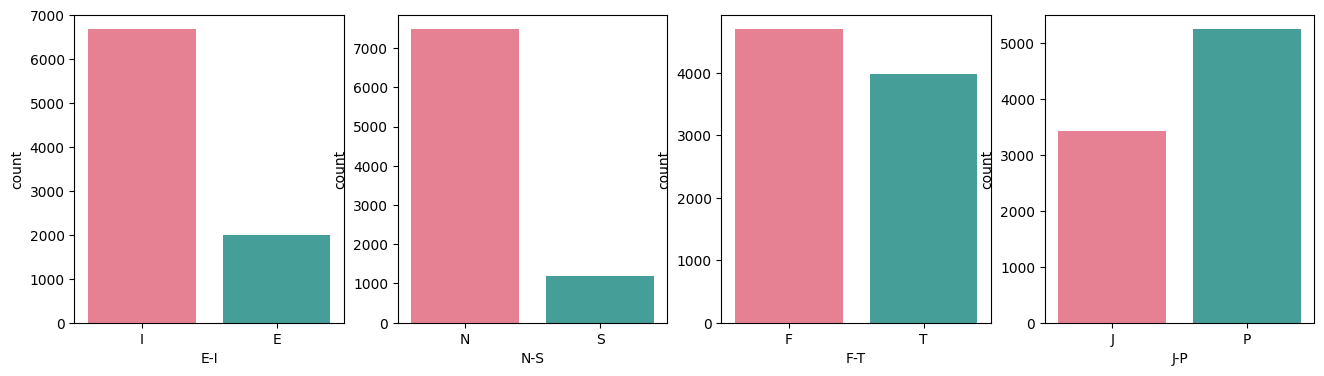

In [57]:
#  this function provides a convenient way to visualize the distribution of categorical variables in a DataFrame
def show_distribution(data, x=["E-I", "N-S", "F-T","J-P"], fig_size=(16,4), xticks_size=10, palette="husl"):
    fig, ax = plt.subplots(len(x), figsize=fig_size)
    j = 0
    for _x in x:
        plt.subplot(1,4, j+1)
        sns.countplot(x=_x, data=data, palette=palette)
        plt.xticks(size=xticks_size)
        j+=1    
        
show_distribution(data)

In [58]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [59]:
oversample = RandomOverSampler()

In [60]:

y_ei = y["type_E"]
y_ns = y["type_N"]
y_ft = y["type_F"]
y_jp = y["type_J"]

In [61]:

X_over_ei, y_over_ei = oversample.fit_resample(X, y_ei)
X_over_ns, y_over_ns = oversample.fit_resample(X, y_ns)
X_over_ft, y_over_ft = oversample.fit_resample(X, y_ft)
X_over_jp, y_over_jp = oversample.fit_resample(X, y_jp)

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


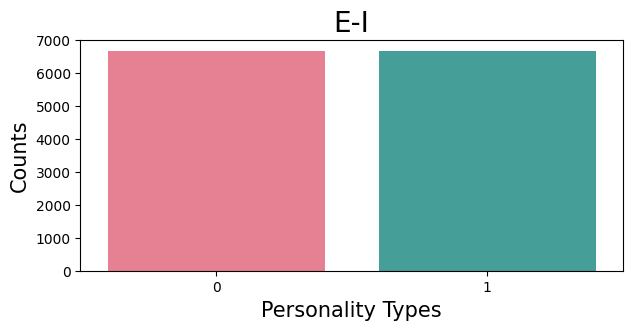

In [62]:

show_class_distribution(data=X_over_ei, x=y_over_ei, figsize=(7,3), title="E-I")

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


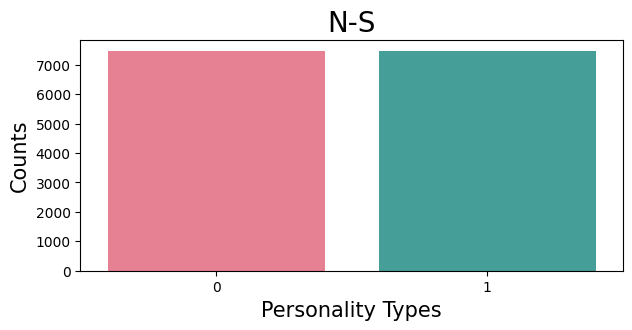

In [63]:

show_class_distribution(data=X_over_ns, x=y_over_ns, figsize=(7,3), title="N-S")

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


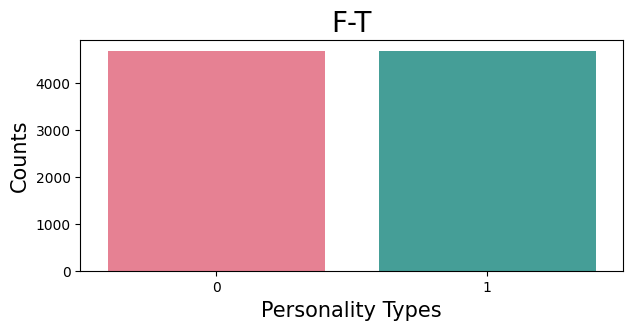

In [64]:
show_class_distribution(data=X_over_ft, x=y_over_ft, figsize=(7,3), title="F-T")

C:\Users\PRACHI VARSHNEY\AppData\Local\Temp\ipykernel_11748\4147169498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


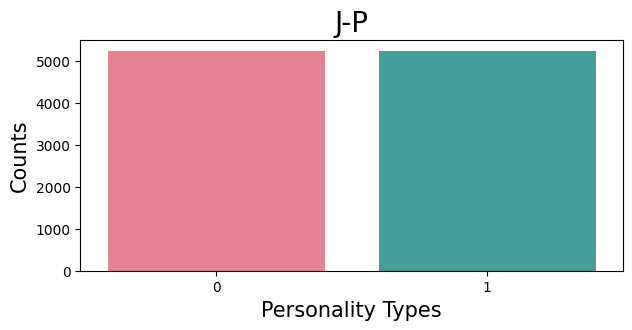

In [65]:
show_class_distribution(data=X_over_jp, x=y_over_jp, figsize=(7,3), title="J-P")

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_over_ei, y_over_ei, test_size=0.3, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_over_ns, y_over_ns, test_size=0.3, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_over_ft, y_over_ft, test_size=0.3, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_over_jp, y_over_jp, test_size=0.3, random_state=42)

In [68]:

X_train_ei = X_train_ei['cleaned_post']
X_train_ns = X_train_ns['cleaned_post']
X_train_ft = X_train_ft['cleaned_post']
X_train_jp = X_train_jp['cleaned_post']

In [69]:

X_test_ei = X_test_ei['cleaned_post']
X_test_ns = X_test_ns['cleaned_post']
X_test_ft = X_test_ft['cleaned_post']
X_test_jp = X_test_jp['cleaned_post']

In [70]:
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"

In [71]:

y_all_train = [y_train_ei, y_train_ns, y_train_ft,  y_train_jp]
y_all_test  = [y_test_ei, y_test_ns, y_test_ft, y_test_jp] 

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer(max_features=10000)

In [74]:
vectorizer.fit(X_train_ei)

TfidfVectorizer(max_features=10000)

In [75]:

X_train_ei = vectorizer.transform(X_train_ei)
X_test_ei  = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.transform(X_train_ns)
X_test_ns  = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.transform(X_train_ft)
X_test_ft  = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.transform(X_train_jp)
X_test_jp  = vectorizer.transform(X_test_jp)

In [76]:
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test  = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]

In [77]:
tf_idf = pd.DataFrame(X_test_ei.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head(10)

aang   ab  aback   abandon  abandoned  abandonment  abba  abbreviation  \
0   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
1   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
2   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
3   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
4   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
5   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
6   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
7   0.0  0.0    0.0  0.059784        0.0          0.0   0.0           0.0   
8   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   
9   0.0  0.0    0.0  0.000000        0.0          0.0   0.0           0.0   

   abhor  abide  ...  zip   zodiac  zoe  zombie      zone  zoned  zoning  zoo  \
0    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
1    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
2    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
3    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
4    0.0    0.0  ...  0.0  0.12045  0.0     0.0  0.045014    0.0     0.0  0.0   
5    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
6    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
7    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
8    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   
9    0.0    0.0  ...  0.0  0.00000  0.0     0.0  0.000000    0.0     0.0  0.0   

   zooey  zoom  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0  
3    0.0   0.0  
4    0.0   0.0  
5    0.0   0.0  
6    0.0   0.0  
7    0.0   0.0  
8    0.0   0.0  
9    0.0   0.0  

[10 rows x 10000 columns]

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost
import pickle
from sklearn import metrics

In [79]:
def create_models():
    nb_clf  = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    dt_clf  = DecisionTreeClassifier(max_depth=7)
    rf_clf  = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(use_label_encoder=False)
    return {"NaiveBayes":nb_clf, "SVM":svm_clf, "DecisionTree":dt_clf, "RandomForest":rf_clf, "Xgboost":xgb_clf}

In [80]:
_metrics = ["Accuracy", "Accuracy", "Accuracy" ,"Accuracy", "Precision", "Precision", "Precision","Precision", "Recall","Recall","Recall","Recall", "F1-Score", "F1-Score", "F1-Score", "F1-Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score"]
_types   = ["E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P"]
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost"]

In [81]:
models = create_models()
models

{'NaiveBayes': MultinomialNB(alpha=0.01),
 'SVM': SVC(gamma='auto', kernel='linear'),
 'DecisionTree': DecisionTreeClassifier(max_depth=7),
 'RandomForest': RandomForestClassifier(n_estimators=750),
 'Xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

In [82]:
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
evaluation_df

NaiveBayes  SVM DecisionTree RandomForest Xgboost
Accuracy      E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Precision     E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Recall        E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
F1-Score      E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Roc-Auc Score E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN

In [85]:
for model_item in models.items():
    for X_train, X_test, y_train, y_test in zip(x_all_train, x_all_test, y_all_train, y_all_test):
        # Model creation and prediction
        model = model_item[1]
        print(f"{model} is training for {y_train.name}...")
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        # Performance evaluation metrics
        evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
        evaluation_df.loc["Precision",y_train.name][model_item[0]]     = round(metrics.precision_score(y_test, pred), 3)
        evaluation_df.loc["Recall",y_train.name][model_item[0]]        = round(metrics.recall_score(y_test, pred), 3)        
        evaluation_df.loc["F1-Score",y_train.name][model_item[0]]      = round(metrics.f1_score(y_test, pred), 3)
        evaluation_df.loc["Roc-Auc Score",y_train.name][model_item[0]] = round(metrics.roc_auc_score(y_test, pred), 3)        
        # Save model
        filename = f'{model}{model_item[0]}_{y_test.name}.sav'
        print(filename)
       

MultinomialNB(alpha=0.01) is training for E-I...
MultinomialNB(alpha=0.01)NaiveBayes_E-I.sav
MultinomialNB(alpha=0.01) is training for N-S...
MultinomialNB(alpha=0.01)NaiveBayes_N-S.sav
MultinomialNB(alpha=0.01) is training for F-T...
MultinomialNB(alpha=0.01)NaiveBayes_F-T.sav
MultinomialNB(alpha=0.01) is training for J-P...
MultinomialNB(alpha=0.01)NaiveBayes_J-P.sav
SVC(gamma='auto', kernel='linear') is training for E-I...
SVC(gamma='auto', kernel='linear')SVM_E-I.sav
SVC(gamma='auto', kernel='linear') is training for N-S...
SVC(gamma='auto', kernel='linear')SVM_N-S.sav
SVC(gamma='auto', kernel='linear') is training for F-T...
SVC(gamma='auto', kernel='linear')SVM_F-T.sav
SVC(gamma='auto', kernel='linear') is training for J-P...
SVC(gamma='auto', kernel='linear')SVM_J-P.sav
DecisionTreeClassifier(max_depth=7) is training for E-I...
DecisionTreeClassifier(max_depth=7)DecisionTree_E-I.sav
DecisionTreeClassifier(max_depth=7) is training for N-S...
DecisionTreeClassifier(max_depth=7)Dec

In [86]:
evaluation_df


NaiveBayes    SVM DecisionTree RandomForest Xgboost
Accuracy      E-I      0.828  0.899        0.796        0.957   0.938
              N-S      0.901  0.951        0.801        0.991   0.973
              F-T      0.811  0.858        0.764        0.844    0.85
              J-P      0.725  0.805        0.716        0.845    0.84
Precision     E-I      0.827  0.883        0.816        0.987   0.918
              N-S      0.904   0.98         0.78        0.988   0.998
              F-T      0.807  0.856        0.763        0.837   0.853
              J-P      0.723  0.796        0.749        0.909   0.828
Recall        E-I      0.831   0.92        0.765        0.926   0.963
              N-S      0.898  0.922        0.842        0.994   0.948
              F-T      0.817   0.86        0.765        0.854   0.846
              J-P      0.723  0.817        0.646        0.765   0.856
F1-Score      E-I      0.829  0.901         0.79        0.956    0.94
              N-S      0.901   0.95         0.81        0.991   0.972
              F-T      0.812  0.858        0.764        0.845   0.849
              J-P      0.723  0.806        0.694        0.831   0.842
Roc-Auc Score E-I      0.828  0.899        0.796        0.957   0.938
              N-S      0.901  0.951          0.8        0.991   0.973
              F-T      0.811  0.858        0.764        0.844    0.85
              J-P      0.725  0.805        0.716        0.845    0.84

In [104]:
filename='vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [88]:
import pandas as pd

# Load evaluation metrics DataFrame
evaluation_df 

# Define the models and metrics
models = ['NaiveBayes', 'SVM', 'DecisionTree', 'RandomForest', 'Xgboost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc-Auc Score']

# Calculate average performance for each model
avg_performance = {model: evaluation_df.loc[metrics, :][model].mean() for model in models}

# Sort models based on average performance
sorted_models = sorted(avg_performance.items(), key=lambda x: x[1], reverse=True)

# Select the top two models
best_models = sorted_models[:2]

# Retrieve filenames of the best two models
best_model_filenames = []
for model, _ in best_models:
    for y_train in evaluation_df.columns[1:]:
        filename = f'{model}{model}_{y_train}.sav'
        best_model_filenames.append(filename)

print("Best two models based on average performance:")
for model, avg_perf in best_models:
    print(f"{model}: {avg_perf}")

import pickle

# Assuming you have best_models defined

# Define filenames for the best two models
best_model_filenames = ["best_model_1.sav", "best_model_2.sav"]

# Save the best two models into files
for model, filename in zip(best_models, best_model_filenames):
    pickle.dump(model, open(filename, 'wb'))

print("Best two models have been saved into files:")
for model, filename in zip(best_models, best_model_filenames):
    print(f"{model[0]} -> {filename}")



Best two models based on average performance:
RandomForest: 0.90785
Xgboost: 0.90075
Best two models have been saved into files:
RandomForest -> best_model_1.sav
Xgboost -> best_model_2.sav
